In [2]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv(r'./data/Traffic_Accident_2017.csv', encoding='euc-kr')
data.T  # 가로 세로 key값을 바꿈

,0,1,2,3,4,5,6,7,8,9,...,4055,4056,4057,4058,4059,4060,4061,4062,4063,4064
발생년,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,...,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017
발생년월일시,2017010101,2017010102,2017010102,2017010102,2017010104,2017010104,2017010105,2017010109,2017010118,2017010120,...,2017123023,2017123100,2017123107,2017123112,2017123117,2017123118,2017123118,2017123119,2017123120,2017123123
발생분,15,28,43,22,37,0,50,25,33,0,...,50,50,4,10,56,10,25,55,40,15
주야,야간,야간,야간,야간,야간,야간,야간,주간,야간,야간,...,야간,야간,주간,주간,주간,야간,야간,야간,야간,야간
요일,일,일,일,일,일,일,일,일,일,일,...,토,일,일,일,일,일,일,일,일,일
사망자수,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
사상자수,2,1,2,1,1,2,1,5,3,7,...,6,1,1,1,1,4,1,1,11,1
중상자수,1,0,0,0,0,1,0,3,1,4,...,2,0,0,0,0,1,0,0,1,0
경상자수,0,0,1,0,0,0,0,1,1,2,...,3,0,0,0,0,0,0,0,9,0
부상신고자수,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0


In [3]:
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname='C:\\Windows\\Fonts\\malgun.ttf').get_name()
rc('font', family=font_name)

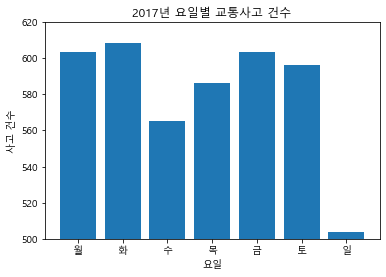

In [10]:
t = data['요일'].value_counts()
y = t[['월','화','수','목','금','토','일']]
x = ['월','화','수','목','금','토','일']

plt.ylim(500,620)

plt.title('2017년 요일별 교통사고 건수')
plt.xlabel('요일')
plt.ylabel('사고 건수')

plt.bar(x,y)
plt.show()

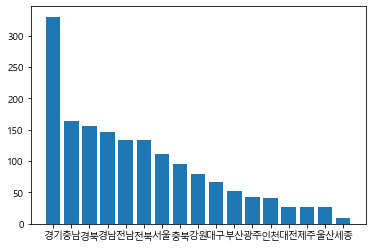

In [13]:
# 차대차 사고발생 시도 시각화
tmp_df = data[ ['발생지시도', '사고유형_대분류'] ][ data['사고유형_대분류'] == '차대차' ]
tmp_df = tmp_df['발생지시도'].value_counts()
x = tmp_df.index
y = tmp_df.values

plt.bar(x, y) 
plt.show()

In [36]:
# 카테고리 짓는 예시
ages = [0,2,10,21,23,37,31,61,20,41,32,100]
bins = [0,15,25,35,60,99]
labels = ['미성년자','청년','중년','장년','노년']
cats = pd.cut(ages, bins, labels=labels)
cats.value_counts()

미성년자    2
청년      3
중년      2
장년      2
노년      1
dtype: int64

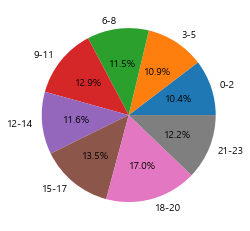

In [45]:
# 사고 시간대별 시각화
# 0-2, 3-5, 6-8, 9-11, 12-14, 15-17, 18-20, 21-23시 8개의 구간

bins = [-1,2,5,8,11,14,17,20,24]
labels = ['0-2', '3-5', '6-8', '9-11', '12-14', '15-17', '18-20','21-23']

temp_df = data['발생년월일시']%100
temp_df.value_counts().sort_index()

cats = pd.cut(temp_df.values, bins, labels=labels)
r = cats.value_counts()

plt.pie(r, labels=labels, autopct='%1.1f%%')
plt.show()

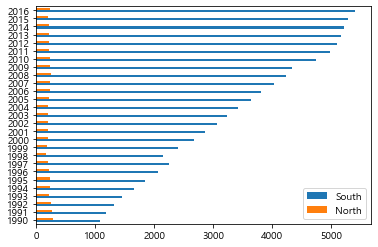

In [22]:
# 판다스로 시각화

df = pd.read_excel(r'./data/남북한발전전력량.xlsx', encoding='utf-8')
df_ns = df.iloc[[0,5], 2:]
df_ns.index = ['South', 'North']
df_ns.columns = df_ns.columns.map(int)
df_ns = df_ns.T
df_ns.plot(kind='barh')

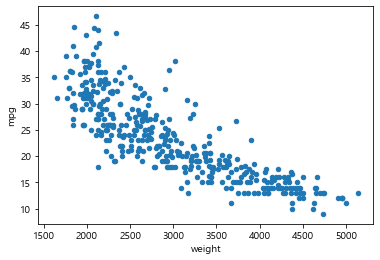

In [63]:
df = pd.read_csv(r'./data/auto-mpg.csv')

# 열 이름을 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name']
df.plot(x='weight', y='mpg', kind='scatter') # 무거울 수록 연비가 떨어짐